### Treść zadania

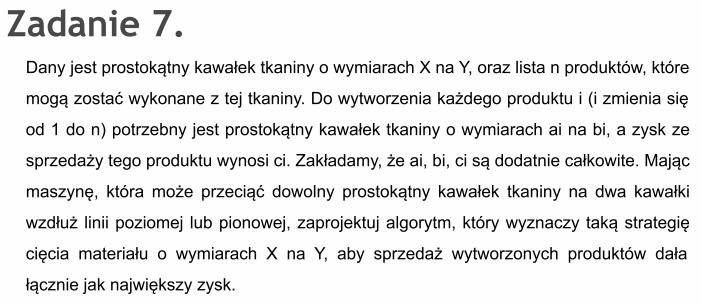

### Omówienie algorytmu

Strategia będzie bardzo podobna do tej, jaka została zaprezentowana w algorytmie *Cięcie pręta*. W tym przypadku jednak mamy taką funkcję rekurencyjną: <br>
$ f(i, j) $ - maksymalny zysk z pocięcia na kawałki i sprzedaży fragmentu tkaniny o wymiarach $ i \times j $.

### Implementacja

In [1]:
def cut_canvas(P: 'array of profits', x: 'width of the canvas', y: 'height of the canvas'):
    F = [[-1] * (x + 1) for _ in range(y + 1)]
    
    def cut(i, j):
        if i == 0 or j == 0:
            F[i][j] = 0
        if F[i][j] < 0: 
            F[i][j] = P[i][j]
            # Cut horizontally into two parts
            for h in range(1, i // 2 + 1):
                F[i][j] = max(F[i][j], cut(h, j) + cut(i - h, j))
            # Cut vertically into two parts
            for w in range(1, j // 2 + 1):
                F[i][j] = max(F[i][j], cut(i, w) + cut(i, j - w))
        return F[i][j]
    
    return cut(y, x)

###### Kilka testów

##### Pomocnicze:

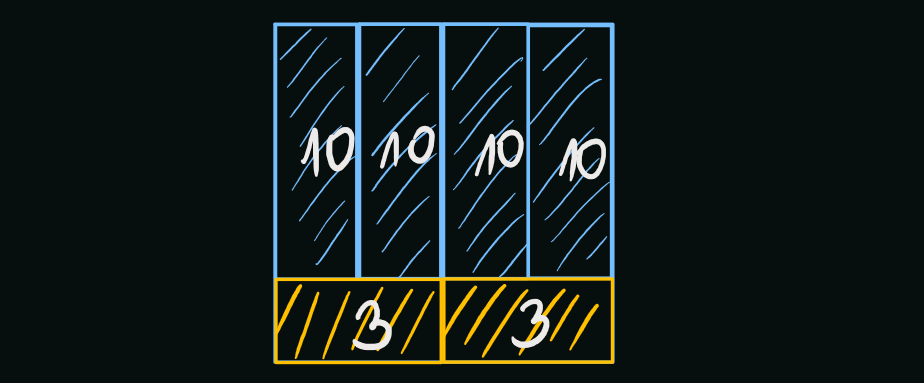

In [2]:
P = [
    [0, 0, 0, 0, 0],
    [0, 1, 3, 2, 5],
    [0, 2, 4, 8, 9],
    [0, 10, 7, 13, 12],
    [0, 11, 6, 14, 15]
]

In [3]:
x = 4
y = 4
print(cut_canvas(P, x, y))

46


### (Dodatkowo) Odczytywanie rozwiązania

In [4]:
def get_pieces(C: 'array of cuts'):
    pieces = []
    
    def recur(y, x):
        if not C[y][x]:
            pieces.append((x, y))
        else:
            h, w = C[y][x]
            recur(h, w)
            if w == x:
                recur(y - h, w)
            elif h == y:
                recur(h, x - w)
                
    recur(len(C) - 1, len(C[0]) - 1)
    
    return pieces
    

def cut_canvas(P: 'array of profits', x: 'width of the canvas', y: 'height of the canvas'):
    F = [[-1] * (x + 1) for _ in range(y + 1)]
    C = [[None] * (x + 1) for _ in range(y + 1)]
    
    def cut(i, j):
        if i == 0 or j == 0:
            F[i][j] = 0
        if F[i][j] < 0: 
            F[i][j] = P[i][j]
            # Cut horizontally into two parts
            for h in range(1, i // 2 + 1):
                profit = cut(h, j) + cut(i - h, j)
                if profit > F[i][j]:
                    F[i][j] = profit
                    C[i][j] = (h, j)
            # Cut vertically into two parts
            for w in range(1, j // 2 + 1):
                profit = cut(i, w) + cut(i, j - w)
                if profit > F[i][j]:
                    F[i][j] = profit
                    C[i][j] = (i, w)
        return F[i][j]
    
    cut(y, x)
    
    return F[y][x], get_pieces(C)

###### Kilka testów

##### Pomocnicze:

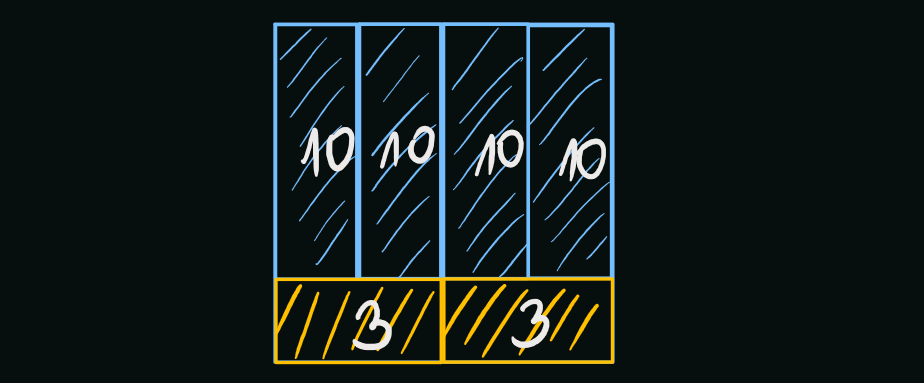

In [5]:
P = [
    [0, 0, 0, 0, 0],
    [0, 1, 3, 2, 5],
    [0, 2, 4, 8, 9],
    [0, 10, 7, 13, 12],
    [0, 11, 6, 14, 15]
]

In [6]:
x = 4
y = 4
print(cut_canvas(P, x, y))

(46, [(2, 1), (2, 1), (1, 3), (1, 3), (1, 3), (1, 3)])


In [7]:
x = 4
y = 3
print(cut_canvas(P, x, y))

(40, [(1, 3), (1, 3), (1, 3), (1, 3)])
